In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.datasets import FashionMNIST

In [2]:
print(torch.__version__)

2.0.0


In [3]:
%matplotlib inline

## Data download

In [4]:
train_ds = FashionMNIST(root = "../DanielBourke/FashionMnistData", train = True, download = False, transform = ToTensor())
len(train_ds)

60000

In [5]:
test_ds = FashionMNIST(root = "../DanielBourke/FashionMnistData", train = False, download = False, transform = ToTensor())
len(test_ds)

10000

### Splitting training data into training and validation set

In [6]:
train_ds, valid_ds = random_split(train_ds, [50000, 10000])

In [7]:
len(train_ds), len(valid_ds)

(50000, 10000)

### Visualization

In [8]:
len(train_ds[0])

2

In [9]:
image, label = train_ds[15]

Image shape: torch.Size([1, 28, 28])
Label : 3


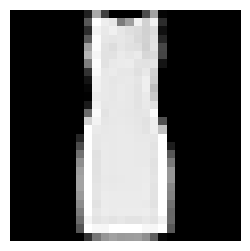

In [10]:
print(f"Image shape: {image.shape}")
print(f"Label : {label}")
plt.figure(figsize=(3,3))
plt.imshow(image.permute(1,2,0), cmap = 'gray')
plt.axis('off')
plt.show()

### Dataloader

In [11]:
batch_size = 128

In [12]:
train_dl = DataLoader(dataset = train_ds, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(dataset = valid_ds, batch_size = batch_size*2, shuffle= False)
test_dl = DataLoader(dataset = test_ds, batch_size=batch_size*2, shuffle = False)

In [13]:
for xb, yb in train_dl:
    print(f"Image shape: {xb.shape}")
    print(f"label shape: {yb.shape}")
    break

Image shape: torch.Size([128, 1, 28, 28])
label shape: torch.Size([128])


### Visualization of a batch

In [14]:
from torchvision.utils import make_grid

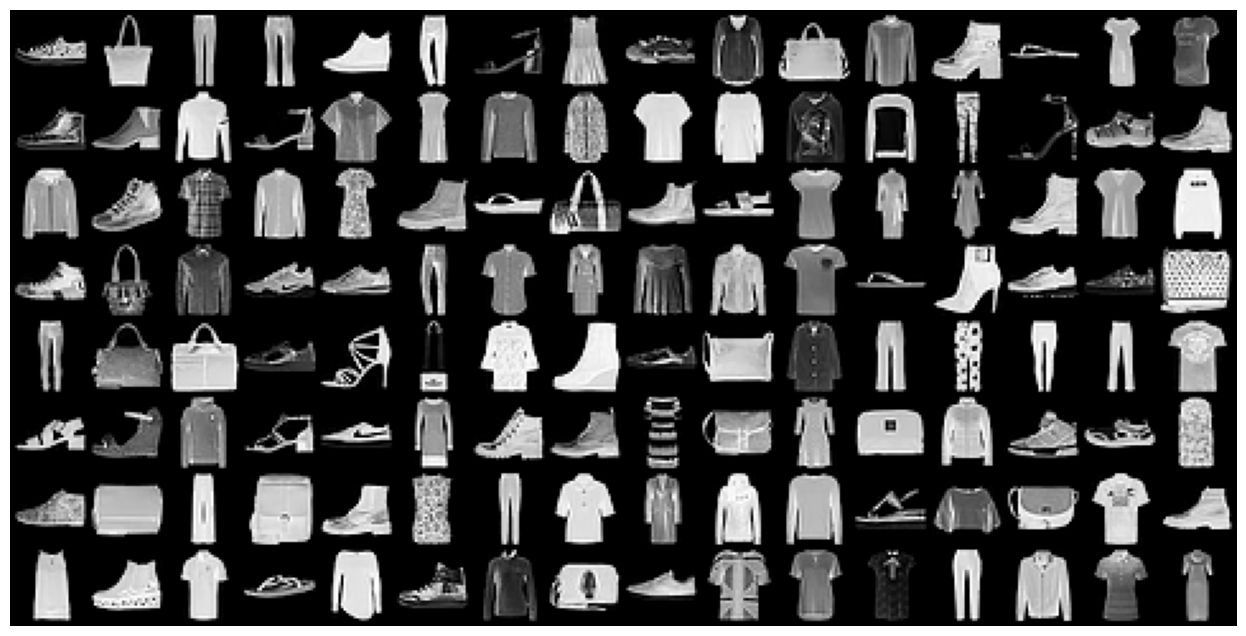

In [15]:
for xb, yb in train_dl:
    plt.figure(figsize = (16, 8)) ## batch = 128 = 16*8
    plt.imshow(make_grid(xb, nrow=16).permute(1,2,0), cmap = 'gray')
    plt.axis('off')   
    plt.show()
    break

## Sample Test with our data

In [16]:
len(train_ds.dataset.classes)

10

In [17]:
input_size = 1*28*28
num_classes = len(train_ds.dataset.classes)

In [18]:
class FashionMnistModel_V0(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=input_size, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, xb):
        xb = xb.view(-1, (1*28*28))
        xb = self.layer_1(xb)
        xb = self.relu(xb)
        xb = self.layer_2(xb)
        return xb

In [19]:
model_0 = FashionMnistModel_V0(input_size,num_classes)
model_0

FashionMnistModel_V0(
  (layer_1): Linear(in_features=784, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=10, bias=True)
  (relu): ReLU()
)

In [20]:
for xb, yb in train_dl:
    print(f"Image shape: {xb.shape}")
    print(f"label shape: {yb.shape}")
    logits = model_0(xb)
    break

Image shape: torch.Size([128, 1, 28, 28])
label shape: torch.Size([128])


In [21]:
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [22]:
loss = loss_fn(logits, yb)
loss

tensor(2.3327, grad_fn=<NllLossBackward0>)

In [23]:
logits

tensor([[-0.0025, -0.2224,  0.1035,  ..., -0.0064, -0.1697,  0.4480],
        [-0.0148, -0.0203,  0.1090,  ..., -0.1713, -0.1082,  0.6805],
        [-0.0268, -0.0641,  0.0655,  ..., -0.1595, -0.1107,  0.5130],
        ...,
        [-0.0571, -0.1823,  0.0923,  ..., -0.0478, -0.1307,  0.5335],
        [ 0.0374, -0.1587,  0.0205,  ..., -0.0215, -0.1068,  0.3296],
        [ 0.0164, -0.2337,  0.1328,  ..., -0.0613, -0.0815,  0.5489]],
       grad_fn=<AddmmBackward0>)

In [24]:
logits.shape, yb.shape

(torch.Size([128, 10]), torch.Size([128]))

In [25]:
## for finding accuracy we need to turn logits to predictions
values, preds = torch.max(logits, dim=1)

In [26]:
values

tensor([0.4480, 0.6805, 0.5130, 0.3485, 0.4661, 0.4650, 0.6336, 0.5354, 0.3560,
        0.4708, 0.3670, 0.6026, 0.4081, 0.5614, 0.5963, 0.5628, 0.6563, 0.4149,
        0.4059, 0.6118, 0.5524, 0.6195, 0.4953, 0.3895, 0.4761, 0.3509, 0.3622,
        0.5298, 0.6376, 0.5218, 0.4264, 0.4911, 0.4190, 0.5547, 0.4153, 0.5386,
        0.4017, 0.4306, 0.3904, 0.6192, 0.4083, 0.5695, 0.6028, 0.4458, 0.3825,
        0.4930, 0.4275, 0.3593, 0.5248, 0.6315, 0.3378, 0.4448, 0.4654, 0.4242,
        0.6074, 0.5786, 0.6148, 0.5615, 0.4039, 0.5356, 0.3331, 0.6398, 0.4491,
        0.5842, 0.5514, 0.5108, 0.3430, 0.5687, 0.3886, 0.3713, 0.5078, 0.3339,
        0.3543, 0.5247, 0.3339, 0.5385, 0.5391, 0.5304, 0.6550, 0.3855, 0.5981,
        0.3690, 0.5076, 0.4072, 0.4452, 0.5913, 0.4403, 0.3352, 0.5854, 0.5203,
        0.4512, 0.5858, 0.6382, 0.3332, 0.4576, 0.5125, 0.4954, 0.3667, 0.6264,
        0.4243, 0.3232, 0.4701, 0.5752, 0.7527, 0.3297, 0.5527, 0.5764, 0.3830,
        0.3443, 0.4426, 0.6387, 0.4345, 

In [27]:
preds, preds.shape

(tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
         9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
         9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
         9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
         9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
         9, 9, 9, 9, 9, 9, 9, 9]),
 torch.Size([128]))

In [28]:
def accuracy(logits, labels):
    _, preds = torch.max(logits, dim=1)
    accuracy = torch.sum(preds==labels).item()/len(labels)
    return torch.tensor(accuracy)

In [29]:
accuracy(logits=logits, labels=yb)

tensor(0.0859)

## Necessary functions

In [30]:
from tqdm.auto import tqdm

In [31]:
def fit(epochs, model, train_loader, val_loader, lr, opt_func = torch.optim.SGD):
    
    optimizer = opt_func(model.parameters(), lr)
    train_loss = []
    train_acc = []
    history = []
    for epoch in range(epochs):
        ## Training
        for batch in tqdm(train_loader):
            model.train()
            loss, acc = model.training_step(batch)
            train_loss.append(loss)
            train_acc.append(acc)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        ## Testing
        model.eval()
        with torch.inference_mode():
            result = evaluate(model, valid_dl)
            result['train_loss'] = torch.stack(train_loss).mean()
            result['train_acc'] = torch.stack(train_acc).mean()
            model.epoch_end(epoch, result)
            history.append(result)
    return history

In [32]:
class FashionMnistModel_V1(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=input_size, out_features=128)
        # self.layer_2 = nn.Linear(in_features=32, out_features=64)
        self.layer_2 = nn.Linear(in_features=128, out_features=num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, xb):
        xb = xb.view(-1, (1*28*28))
        xb = self.layer_1(xb)
        xb = self.relu(xb)
        xb = self.layer_2(xb)
        # xb = self.relu(xb)
        # xb = self.layer_3(xb)
        return xb
    
    def training_step(self, batch):
        xb,yb = batch
        logits = self(xb)
        loss = loss_fn(logits, yb)
        acc = accuracy(logits, yb)
        return loss, acc
    
    def validation_step(self, batch):
        xb,yb = batch
        logits = self(xb)
        loss = loss_fn(logits, yb)
        acc = accuracy(logits, yb)
        return {'val/test_loss': loss, 'val/test_acc': acc}
    
    def validation_epoch_end(self, result):
        batch_loss = [x['val/test_loss'] for x in result]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['val/test_acc'] for x in result]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss': epoch_loss.item(), 'val_accuracy': epoch_acc.item()}
    
    def epoch_end(self, epoch, end_result):
        print(f"Epoch [{epoch+1}] | Training Loss: {end_result['train_loss']:.4f} | Training Accuracy: {end_result['train_acc']:.4f} | Validation/Test Loss: {end_result['val_loss']:.4f} | Validation/Test Accuracy: {end_result['val_accuracy']:.4f}")

In [33]:
def evaluate(model, dataloader):
    preds = [model.validation_step(batch) for batch in dataloader]
    return model.validation_epoch_end(preds)

In [57]:
model = FashionMnistModel_V1(input_size, num_classes)
model

FashionMnistModel_V1(
  (layer_1): Linear(in_features=784, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

In [58]:
evaluate(model, valid_dl)

{'val_loss': 2.2907910346984863, 'val_accuracy': 0.11582031100988388}

In [59]:
history = fit(epochs=10, model = model, train_loader=train_dl, val_loader=valid_dl,lr = 0.001)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 2.2038 | Training Accuracy: 0.3252 | Validation/Test Loss: 2.1229 | Validation/Test Accuracy: 0.4616


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 2.1231 | Training Accuracy: 0.4206 | Validation/Test Loss: 1.9583 | Validation/Test Accuracy: 0.5515


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 2.0381 | Training Accuracy: 0.4722 | Validation/Test Loss: 1.7774 | Validation/Test Accuracy: 0.5982


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 1.9504 | Training Accuracy: 0.5077 | Validation/Test Loss: 1.6013 | Validation/Test Accuracy: 0.6265


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 1.8647 | Training Accuracy: 0.5346 | Validation/Test Loss: 1.4488 | Validation/Test Accuracy: 0.6466


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6] | Training Loss: 1.7845 | Training Accuracy: 0.5547 | Validation/Test Loss: 1.3249 | Validation/Test Accuracy: 0.6521


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7] | Training Loss: 1.7114 | Training Accuracy: 0.5699 | Validation/Test Loss: 1.2262 | Validation/Test Accuracy: 0.6598


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8] | Training Loss: 1.6455 | Training Accuracy: 0.5819 | Validation/Test Loss: 1.1473 | Validation/Test Accuracy: 0.6672


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9] | Training Loss: 1.5864 | Training Accuracy: 0.5920 | Validation/Test Loss: 1.0834 | Validation/Test Accuracy: 0.6715


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10] | Training Loss: 1.5333 | Training Accuracy: 0.6005 | Validation/Test Loss: 1.0311 | Validation/Test Accuracy: 0.6808


In [60]:
history += fit(epochs=10, model = model, train_loader=train_dl, val_loader=valid_dl,lr = 0.003)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.9710 | Training Accuracy: 0.6884 | Validation/Test Loss: 0.9208 | Validation/Test Accuracy: 0.7005


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.9268 | Training Accuracy: 0.6973 | Validation/Test Loss: 0.8501 | Validation/Test Accuracy: 0.7164


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.8923 | Training Accuracy: 0.7058 | Validation/Test Loss: 0.8001 | Validation/Test Accuracy: 0.7287


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.8643 | Training Accuracy: 0.7136 | Validation/Test Loss: 0.7628 | Validation/Test Accuracy: 0.7398


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.8407 | Training Accuracy: 0.7204 | Validation/Test Loss: 0.7327 | Validation/Test Accuracy: 0.7523


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6] | Training Loss: 0.8203 | Training Accuracy: 0.7265 | Validation/Test Loss: 0.7067 | Validation/Test Accuracy: 0.7594


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7] | Training Loss: 0.8024 | Training Accuracy: 0.7320 | Validation/Test Loss: 0.6851 | Validation/Test Accuracy: 0.7679


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8] | Training Loss: 0.7865 | Training Accuracy: 0.7372 | Validation/Test Loss: 0.6667 | Validation/Test Accuracy: 0.7750


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9] | Training Loss: 0.7721 | Training Accuracy: 0.7420 | Validation/Test Loss: 0.6499 | Validation/Test Accuracy: 0.7804


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10] | Training Loss: 0.7589 | Training Accuracy: 0.7465 | Validation/Test Loss: 0.6348 | Validation/Test Accuracy: 0.7869


In [61]:
history += fit(epochs=10, model = model, train_loader=train_dl, val_loader=valid_dl,lr = 0.009)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.6165 | Training Accuracy: 0.7948 | Validation/Test Loss: 0.6009 | Validation/Test Accuracy: 0.7951


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.6007 | Training Accuracy: 0.7999 | Validation/Test Loss: 0.5714 | Validation/Test Accuracy: 0.8080


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.5875 | Training Accuracy: 0.8041 | Validation/Test Loss: 0.5496 | Validation/Test Accuracy: 0.8163


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.5761 | Training Accuracy: 0.8078 | Validation/Test Loss: 0.5405 | Validation/Test Accuracy: 0.8148


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.5663 | Training Accuracy: 0.8108 | Validation/Test Loss: 0.5216 | Validation/Test Accuracy: 0.8233


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6] | Training Loss: 0.5576 | Training Accuracy: 0.8133 | Validation/Test Loss: 0.5090 | Validation/Test Accuracy: 0.8308


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7] | Training Loss: 0.5499 | Training Accuracy: 0.8155 | Validation/Test Loss: 0.5006 | Validation/Test Accuracy: 0.8292


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8] | Training Loss: 0.5430 | Training Accuracy: 0.8175 | Validation/Test Loss: 0.4906 | Validation/Test Accuracy: 0.8315


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9] | Training Loss: 0.5367 | Training Accuracy: 0.8194 | Validation/Test Loss: 0.4834 | Validation/Test Accuracy: 0.8344


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10] | Training Loss: 0.5310 | Training Accuracy: 0.8211 | Validation/Test Loss: 0.4771 | Validation/Test Accuracy: 0.8370


In [62]:
history += fit(epochs=10, model = model, train_loader=train_dl, val_loader=valid_dl,lr = 0.01)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.4735 | Training Accuracy: 0.8371 | Validation/Test Loss: 0.4757 | Validation/Test Accuracy: 0.8376


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.4705 | Training Accuracy: 0.8381 | Validation/Test Loss: 0.4727 | Validation/Test Accuracy: 0.8377


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.4676 | Training Accuracy: 0.8392 | Validation/Test Loss: 0.4616 | Validation/Test Accuracy: 0.8428


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.4649 | Training Accuracy: 0.8401 | Validation/Test Loss: 0.4569 | Validation/Test Accuracy: 0.8464


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.4623 | Training Accuracy: 0.8411 | Validation/Test Loss: 0.4531 | Validation/Test Accuracy: 0.8450


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6] | Training Loss: 0.4598 | Training Accuracy: 0.8419 | Validation/Test Loss: 0.4534 | Validation/Test Accuracy: 0.8440


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7] | Training Loss: 0.4575 | Training Accuracy: 0.8425 | Validation/Test Loss: 0.4443 | Validation/Test Accuracy: 0.8481


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8] | Training Loss: 0.4553 | Training Accuracy: 0.8433 | Validation/Test Loss: 0.4418 | Validation/Test Accuracy: 0.8497


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9] | Training Loss: 0.4532 | Training Accuracy: 0.8440 | Validation/Test Loss: 0.4422 | Validation/Test Accuracy: 0.8495


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10] | Training Loss: 0.4512 | Training Accuracy: 0.8447 | Validation/Test Loss: 0.4349 | Validation/Test Accuracy: 0.8496


In [63]:
history += fit(epochs=10, model = model, train_loader=train_dl, val_loader=valid_dl,lr = 0.03)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.4395 | Training Accuracy: 0.8476 | Validation/Test Loss: 0.4422 | Validation/Test Accuracy: 0.8439


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.4349 | Training Accuracy: 0.8492 | Validation/Test Loss: 0.4388 | Validation/Test Accuracy: 0.8452


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.4307 | Training Accuracy: 0.8510 | Validation/Test Loss: 0.4279 | Validation/Test Accuracy: 0.8501


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.4268 | Training Accuracy: 0.8522 | Validation/Test Loss: 0.4350 | Validation/Test Accuracy: 0.8480


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.4233 | Training Accuracy: 0.8533 | Validation/Test Loss: 0.4224 | Validation/Test Accuracy: 0.8539


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6] | Training Loss: 0.4199 | Training Accuracy: 0.8546 | Validation/Test Loss: 0.4055 | Validation/Test Accuracy: 0.8565


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7] | Training Loss: 0.4168 | Training Accuracy: 0.8556 | Validation/Test Loss: 0.4425 | Validation/Test Accuracy: 0.8440


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8] | Training Loss: 0.4137 | Training Accuracy: 0.8566 | Validation/Test Loss: 0.4021 | Validation/Test Accuracy: 0.8593


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9] | Training Loss: 0.4108 | Training Accuracy: 0.8576 | Validation/Test Loss: 0.4002 | Validation/Test Accuracy: 0.8599


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10] | Training Loss: 0.4080 | Training Accuracy: 0.8586 | Validation/Test Loss: 0.4157 | Validation/Test Accuracy: 0.8488


In [64]:
history += fit(epochs=10, model = model, train_loader=train_dl, val_loader=valid_dl,lr = 0.09)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.4315 | Training Accuracy: 0.8511 | Validation/Test Loss: 0.4144 | Validation/Test Accuracy: 0.8554


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.4119 | Training Accuracy: 0.8562 | Validation/Test Loss: 0.4015 | Validation/Test Accuracy: 0.8578


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.3995 | Training Accuracy: 0.8602 | Validation/Test Loss: 0.4111 | Validation/Test Accuracy: 0.8498


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.3903 | Training Accuracy: 0.8629 | Validation/Test Loss: 0.3622 | Validation/Test Accuracy: 0.8699


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.3825 | Training Accuracy: 0.8656 | Validation/Test Loss: 0.3579 | Validation/Test Accuracy: 0.8714


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6] | Training Loss: 0.3759 | Training Accuracy: 0.8676 | Validation/Test Loss: 0.3951 | Validation/Test Accuracy: 0.8563


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7] | Training Loss: 0.3702 | Training Accuracy: 0.8695 | Validation/Test Loss: 0.3570 | Validation/Test Accuracy: 0.8696


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8] | Training Loss: 0.3645 | Training Accuracy: 0.8713 | Validation/Test Loss: 0.3435 | Validation/Test Accuracy: 0.8783


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9] | Training Loss: 0.3595 | Training Accuracy: 0.8728 | Validation/Test Loss: 0.3592 | Validation/Test Accuracy: 0.8746


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10] | Training Loss: 0.3551 | Training Accuracy: 0.8741 | Validation/Test Loss: 0.3317 | Validation/Test Accuracy: 0.8822


In [65]:
history += fit(epochs=10, model = model, train_loader=train_dl, val_loader=valid_dl,lr = 0.1)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.3113 | Training Accuracy: 0.8887 | Validation/Test Loss: 0.3368 | Validation/Test Accuracy: 0.8784


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.3089 | Training Accuracy: 0.8891 | Validation/Test Loss: 0.3319 | Validation/Test Accuracy: 0.8833


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.3062 | Training Accuracy: 0.8905 | Validation/Test Loss: 0.3537 | Validation/Test Accuracy: 0.8680


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.3030 | Training Accuracy: 0.8913 | Validation/Test Loss: 0.3260 | Validation/Test Accuracy: 0.8806


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.3005 | Training Accuracy: 0.8921 | Validation/Test Loss: 0.3298 | Validation/Test Accuracy: 0.8813


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6] | Training Loss: 0.2980 | Training Accuracy: 0.8929 | Validation/Test Loss: 0.3291 | Validation/Test Accuracy: 0.8802


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7] | Training Loss: 0.2953 | Training Accuracy: 0.8938 | Validation/Test Loss: 0.3188 | Validation/Test Accuracy: 0.8831


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8] | Training Loss: 0.2930 | Training Accuracy: 0.8946 | Validation/Test Loss: 0.3159 | Validation/Test Accuracy: 0.8861


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9] | Training Loss: 0.2907 | Training Accuracy: 0.8954 | Validation/Test Loss: 0.3266 | Validation/Test Accuracy: 0.8800


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10] | Training Loss: 0.2884 | Training Accuracy: 0.8961 | Validation/Test Loss: 0.3277 | Validation/Test Accuracy: 0.8801


In [81]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '--b')
    plt.plot(val_losses, '-r')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

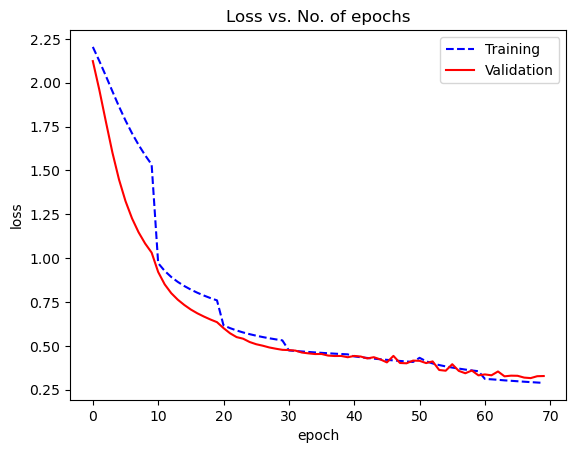

In [82]:
plot_losses(history)

In [83]:
def plot_accuracies(history):
    train_accuracies = [x['train_acc'] for x in history]
    val_accuracies = [x['val_accuracy'] for x in history]
    plt.plot(train_accuracies, '--b')
    plt.plot(val_accuracies, '-r')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])
    plt.title('Accuracy vs. No. of epochs');

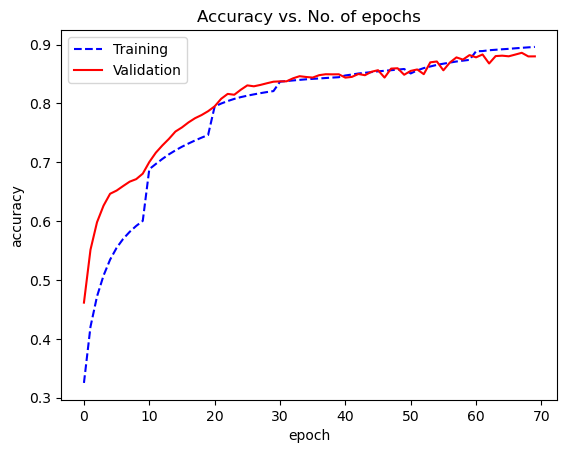

In [84]:
plot_accuracies(history)

### Test set Evaluation

In [85]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_ds.classes[preds[0].item()]

Label: Ankle boot , Predicted: Ankle boot


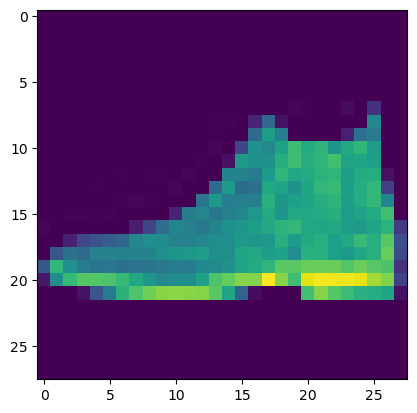

In [87]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Dress , Predicted: Dress


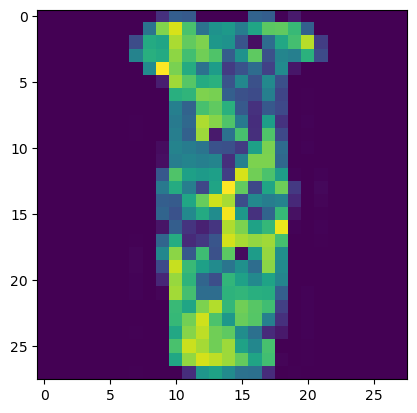

In [88]:
img, label = test_ds[100]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

In [89]:
result = evaluate(model, test_dl)
result

{'val_loss': 0.36048558354377747, 'val_accuracy': 0.8719726800918579}

In [91]:
## Saving and Loading
from pathlib import Path

## Set model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


## Create model save path
MODEL_NAME = 'FashionMnist-ANN.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
torch.save(obj=model.state_dict(), f = MODEL_SAVE_PATH)

In [93]:
## Loading
loaded_model = FashionMnistModel_V1(input_size, num_classes)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model

FashionMnistModel_V1(
  (layer_1): Linear(in_features=784, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

In [94]:
evaluate(loaded_model, test_dl)

{'val_loss': 0.36048558354377747, 'val_accuracy': 0.8719726800918579}